import all files in the folder

In [47]:
import os
from pathlib import Path
from astropy.io import fits

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/"
files =  [ p for p in Path(path).glob('*.fit') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

In [48]:
data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [49]:
data_dict['sun-0001.fit']

array([[593, 554, 532, ..., 549, 537, 316],
       [541, 645, 507, ..., 619, 505, 294],
       [568, 601, 560, ..., 527, 517, 331],
       ...,
       [458, 484, 401, ..., 454, 458, 323],
       [430, 463, 447, ..., 387, 483, 292],
       [480, 468, 476, ..., 513, 430, 333]], dtype=uint16)

In [50]:
data_headers['sun-0001.fit']

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1391 /fastest changing axis                           
NAXIS2  =                 1039 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2021-11-12T08:53:57' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =  0.47999999999999998 /Exposure time in seconds                        
EXPOSURE=  0.47999999999999998 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.020000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   6.45000000000000

In [51]:
data_headers['sun-0001.fit']['DATE-OBS']

'2021-11-12T08:53:57'

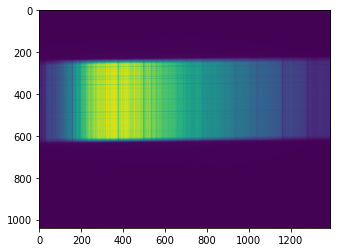

In [52]:
import matplotlib.pyplot as plt 
plt.imshow(data_dict['sun2-0001.fit'])

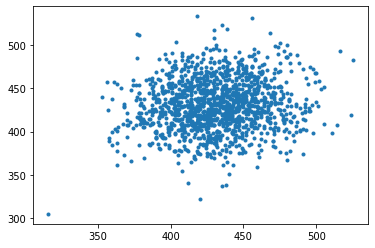

In [53]:
plt.plot(data_dict['sun2-0001.fit'][0],data_dict['sun2-0001.fit'][1], '.')

## Stacking

In [67]:
import os
from pathlib import Path
from astropy.io import fits

path = "C:/Users/bvptr/academia/physics/year2/natuurkunde_en_sterrenkunde_practicum2/solar_physics_non_git/solar_physics_data/NP2 zonnefysica/20211112 - LISA daglicht spectra/"
files =  [ p for p in Path(path).glob('sun2-*.fit') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file) # key of the dict is the filename.

data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [68]:
import numpy as np
stack = np.median([ x for x in data_dict.values()], axis=0)

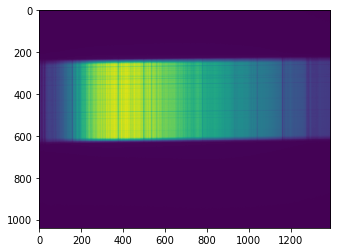

In [69]:
plt.imshow(stack)

cf. non-stacked image

In [ ]:
plt.imshow(data_dict['sun2-0001.fit'])

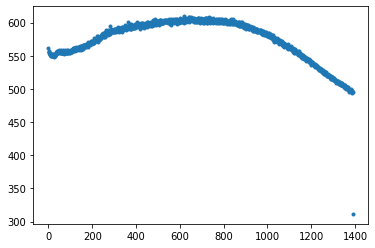

In [105]:
plt.plot(np.median(stack[:], axis=0), '.')

crop the stack

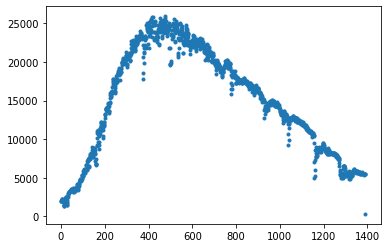

In [106]:
plt.plot(np.median(stack[0:500], axis=0), '.')

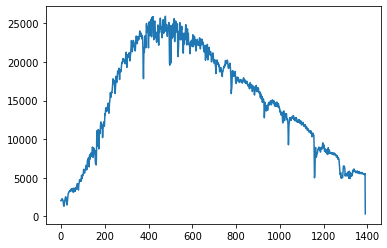

In [107]:
plt.plot(np.median(stack[0:500], axis=0))